<a href="https://colab.research.google.com/github/SolarHO/FX_predict/blob/main/%EB%B3%80%EC%88%98_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. ÌôòÏú®, CRBÏßÄÏàò, Îã¨Îü¨ÏßÄÏàò Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©

In [ ]:
import pandas as pd

usd_old = '/content/USD_KRW Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞.csv'
usd_new = '/content/USD_KRW Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞ (2).csv'

crb_old = '/content/TR_CC CRB Excess Return Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞.csv'
crb_new = '/content/TR_CC CRB Excess Return Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞ (2).csv'

dollar_old = '/content/ÎØ∏Íµ≠ Îã¨Îü¨ ÏßÄÏàò ÏÑ†Î¨º Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞.csv'
dollar_new = '/content/ÎØ∏Íµ≠ Îã¨Îü¨ ÏßÄÏàò ÏÑ†Î¨º Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞ (2).csv'

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò
def preprocess(df, name):
    df['ÎÇ†Ïßú'] = df['ÎÇ†Ïßú'].str.replace(" ", "")  # Í≥µÎ∞± Ï†úÍ±∞
    df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'], format="%Y-%m-%d")  # ÎÇ†Ïßú Î≥ÄÌôò
    df['Ï¢ÖÍ∞Ä'] = df['Ï¢ÖÍ∞Ä'].astype(str).str.replace(",", "")  # Ï≤úÎã®ÏúÑ ÏâºÌëú Ï†úÍ±∞
    df['Ï¢ÖÍ∞Ä'] = pd.to_numeric(df['Ï¢ÖÍ∞Ä'], errors='coerce')  # Ïà´ÏûêÌôî
    return df[['ÎÇ†Ïßú', 'Ï¢ÖÍ∞Ä']].rename(columns={'Ï¢ÖÍ∞Ä': name})

df_usd = pd.concat([
    preprocess(pd.read_csv(usd_old), 'USD/KRW'),
    preprocess(pd.read_csv(usd_new), 'USD/KRW')
]).drop_duplicates(subset='ÎÇ†Ïßú')

df_crb = pd.concat([
    preprocess(pd.read_csv(crb_old), 'CRB'),
    preprocess(pd.read_csv(crb_new), 'CRB')
]).drop_duplicates(subset='ÎÇ†Ïßú')

df_dollar = pd.concat([
    preprocess(pd.read_csv(dollar_old), 'Dollar_Index'),
    preprocess(pd.read_csv(dollar_new), 'Dollar_Index')
]).drop_duplicates(subset='ÎÇ†Ïßú')

# ÎÇ†Ïßú Í∏∞Ï§Ä Î≥ëÌï©
df_merge = pd.merge(df_usd, df_crb, on='ÎÇ†Ïßú', how='outer')
df_merge = pd.merge(df_merge, df_dollar, on='ÎÇ†Ïßú', how='outer')

# Ï†ïÎ†¨ Î∞è Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨(ÏÑ†ÌòïÎ≥¥Í∞ÑÎ≤ï)
df_merge = df_merge.sort_values('ÎÇ†Ïßú').reset_index(drop=True)
df_merge[['USD/KRW', 'CRB', 'Dollar_Index']] = df_merge[['USD/KRW', 'CRB', 'Dollar_Index']].interpolate()
df_merge = df_merge.fillna(method='bfill').fillna(method='ffill')

print(df_merge.head())
print(df_merge.tail())

df_merge.to_csv('/content/ÏµúÏ¢ÖÎ≥ëÌï©_ÌôòÏú®_CRB_Îã¨Îü¨ÏßÄÏàò.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/USD_KRW Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞.csv'

In [ ]:
import pandas as pd
df_merge = pd.read_csv('/content/ÏµúÏ¢ÖÎ≥ëÌï©_ÌôòÏú®_CRB_Îã¨Îü¨ÏßÄÏàò.csv')
df_merge['ÎÇ†Ïßú'] = pd.to_datetime(df_merge['ÎÇ†Ïßú'])

#2. ÏÑ∏ Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

2-1. ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

               USD/KRW       CRB  Dollar_Index
USD/KRW       1.000000 -0.349336      0.607721
CRB          -0.349336  1.000000     -0.636153
Dollar_Index  0.607721 -0.636153      1.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

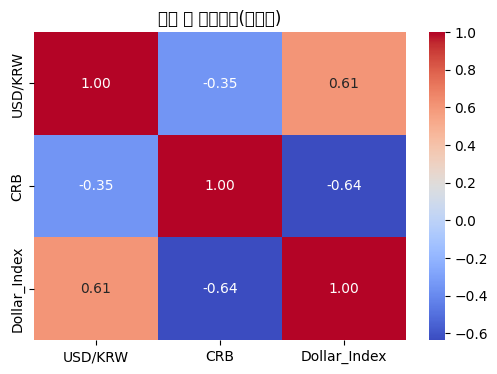

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_merge[['USD/KRW', 'CRB', 'Dollar_Index']].corr()
print(correlation)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò(ÌîºÏñ¥Ïä®)")
plt.show()

2-2 Í∑∏ÎûòÌîÑ ÏãúÏûëÌôî

<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-in

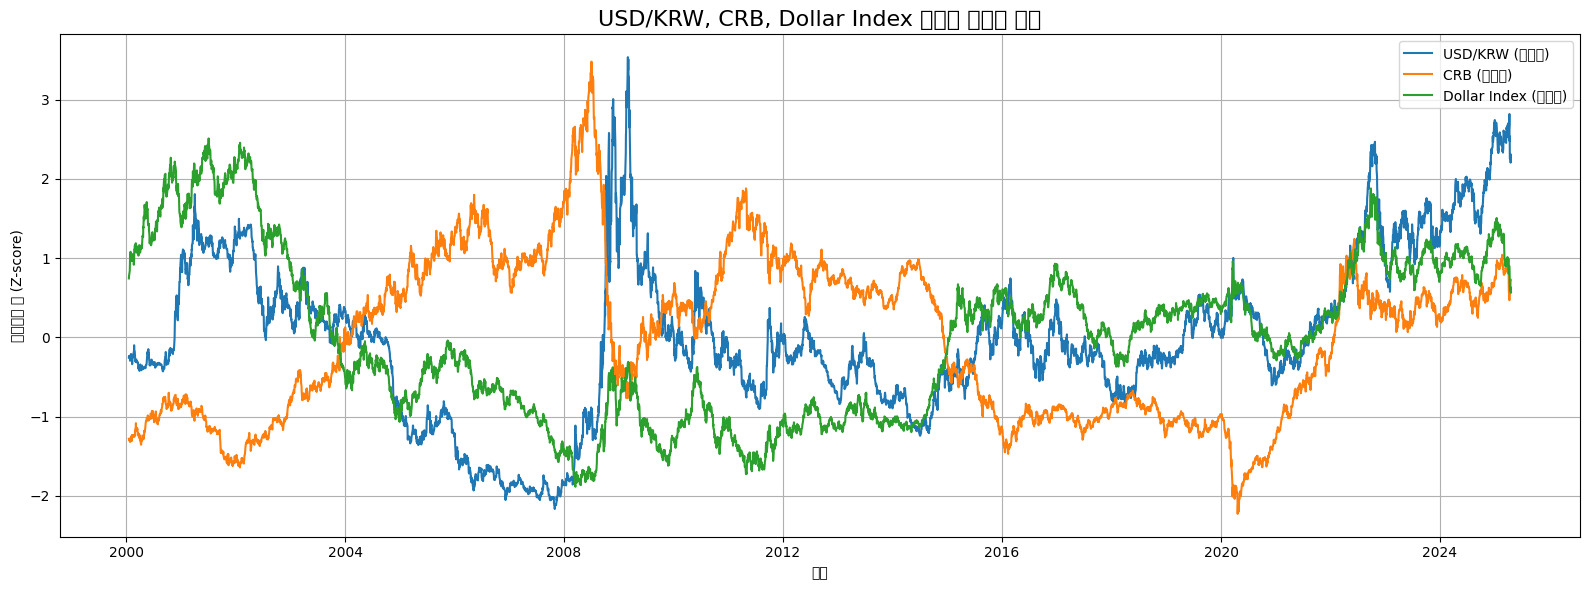

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ÌëúÏ§ÄÌôî
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_merge[['USD/KRW', 'CRB', 'Dollar_Index']])
df_scaled = pd.DataFrame(scaled_values, columns=['USD/KRW', 'CRB', 'Dollar_Index'])
df_scaled['ÎÇ†Ïßú'] = df_merge['ÎÇ†Ïßú']

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(16, 6))
plt.plot(df_scaled['ÎÇ†Ïßú'], df_scaled['USD/KRW'], label='USD/KRW (ÌëúÏ§ÄÌôî)', linewidth=1.5)
plt.plot(df_scaled['ÎÇ†Ïßú'], df_scaled['CRB'], label='CRB (ÌëúÏ§ÄÌôî)', linewidth=1.5)
plt.plot(df_scaled['ÎÇ†Ïßú'], df_scaled['Dollar_Index'], label='Dollar Index (ÌëúÏ§ÄÌôî)', linewidth=1.5)

plt.title('USD/KRW, CRB, Dollar Index ÌëúÏ§ÄÌôî ÏãúÍ≥ÑÏó¥ ÎπÑÍµê', fontsize=16)
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÌëúÏ§ÄÌôîÎêú Í∞í (Z-score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2-3. CRBÏßÄÏàò Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÏÑù

2000~2019ÎÖÑ ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.62
2020~2025ÎÖÑ ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.74


<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu

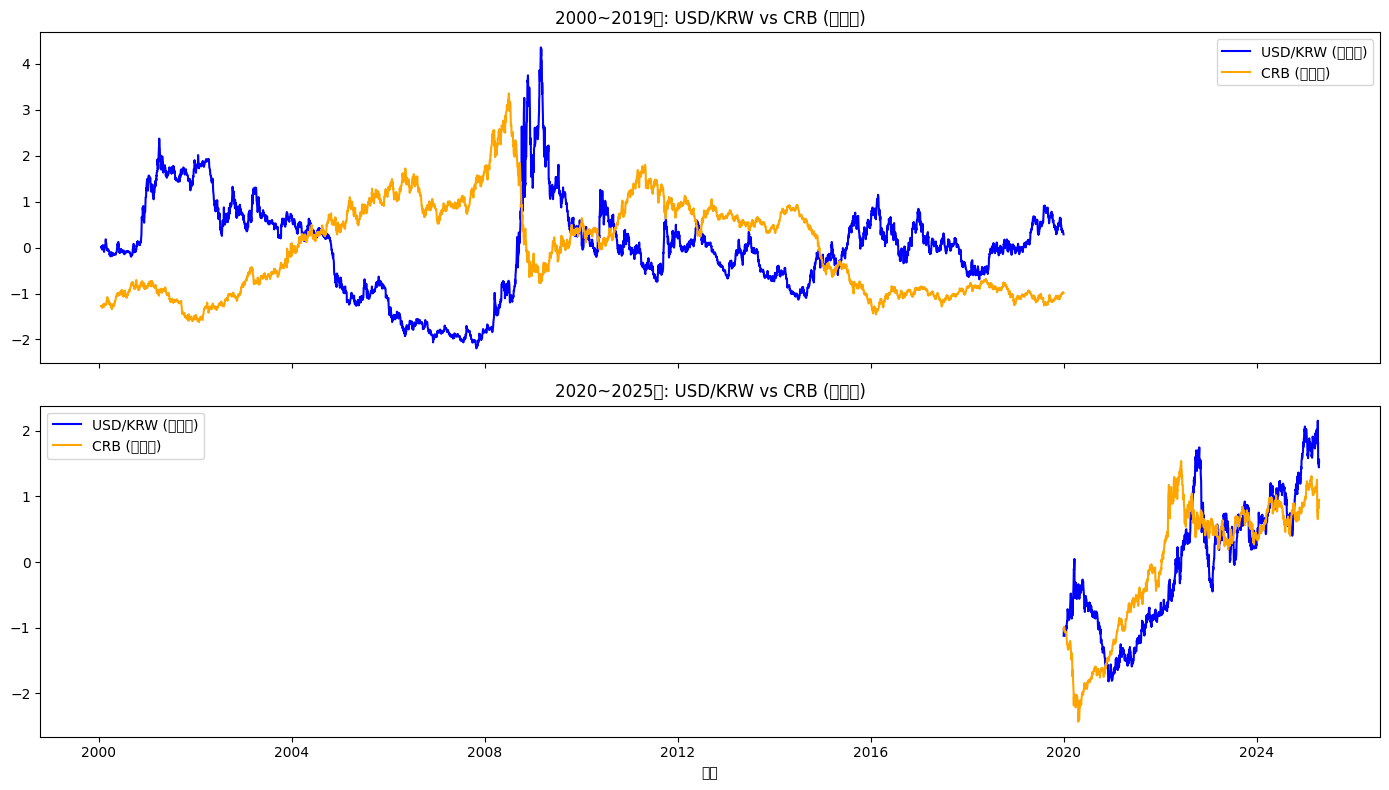

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("ÏµúÏ¢ÖÎ≥ëÌï©_ÌôòÏú®_CRB_Îã¨Îü¨ÏßÄÏàò.csv")
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])

# ÌïÑÏöîÌïú Ïó¥Îßå Ï∂îÏ∂ú
df_crb = df[['ÎÇ†Ïßú', 'USD/KRW', 'CRB']].dropna()

# Íµ¨Í∞Ñ Î∂ÑÎ¶¨
split_date = pd.to_datetime("2020-01-01")
df_before = df_crb[df_crb['ÎÇ†Ïßú'] < split_date].copy()
df_after = df_crb[df_crb['ÎÇ†Ïßú'] >= split_date].copy()

# ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_before = df_before[['USD/KRW', 'CRB']].corr(method='pearson').iloc[0, 1]
corr_after = df_after[['USD/KRW', 'CRB']].corr(method='pearson').iloc[0, 1]

print(f"2000~2019ÎÖÑ ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_before:.2f}")
print(f"2020~2025ÎÖÑ ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_after:.2f}")

# ÌëúÏ§ÄÌôî
df_before[['USD/KRW_z', 'CRB_z']] = df_before[['USD/KRW', 'CRB']].apply(zscore)
df_after[['USD/KRW_z', 'CRB_z']] = df_after[['USD/KRW', 'CRB']].apply(zscore)

fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

axs[0].plot(df_before['ÎÇ†Ïßú'], df_before['USD/KRW_z'], label='USD/KRW (ÌëúÏ§ÄÌôî)', color='blue')
axs[0].plot(df_before['ÎÇ†Ïßú'], df_before['CRB_z'], label='CRB (ÌëúÏ§ÄÌôî)', color='orange')
axs[0].set_title('2000~2019ÎÖÑ: USD/KRW vs CRB (ÌëúÏ§ÄÌôî)')
axs[0].legend()

axs[1].plot(df_after['ÎÇ†Ïßú'], df_after['USD/KRW_z'], label='USD/KRW (ÌëúÏ§ÄÌôî)', color='blue')
axs[1].plot(df_after['ÎÇ†Ïßú'], df_after['CRB_z'], label='CRB (ÌëúÏ§ÄÌôî)', color='orange')
axs[1].set_title('2020~2025ÎÖÑ: USD/KRW vs CRB (ÌëúÏ§ÄÌôî)')
axs[1].legend()

plt.xlabel('ÎÇ†Ïßú')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_merge = pd.read_csv('/content/ÏµúÏ¢ÖÎ≥ëÌï©_ÌôòÏú®_CRB_Îã¨Îü¨ÏßÄÏàò.csv')
df_merge['ÎÇ†Ïßú'] = pd.to_datetime(df_merge['ÎÇ†Ïßú'])

# 2. VIX ÏßÄÏàò Îã§Ïö¥Î°úÎìú Î∞è ÎÇ†Ïßú Ï†ïÎ¶¨
vix = yf.download('^VIX', start='2000-01-20', end='2025-04-19')[['Close']]
vix = vix.rename(columns={'Close': 'VIX'})
vix = vix.reset_index()              # Ïù∏Îç±Ïä§Î•º Ï¥àÍ∏∞Ìôî
vix.columns = ['ÎÇ†Ïßú', 'VIX']        # ÎÇ†Ïßú Ïª¨Îüº Ïù¥Î¶Ñ ÌÜµÏùº

# 3. Î≥ëÌï©
df_with_vix = pd.merge(df_merge, vix, on='ÎÇ†Ïßú', how='left')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^VIX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [ ]:
df_with_vix.to_csv('./Î≥ëÌï©ver2.csv')

NameError: name 'df_with_vix' is not defined

In [ ]:
import pandas as pd
df_with_vix = pd.read_csv('/content/Î≥ëÌï©ver2.csv')
df_with_vix['ÎÇ†Ïßú'] = pd.to_datetime(df_with_vix['ÎÇ†Ïßú'])

<ipython-input-5-76e0e2e6fd87>:11: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-76e0e2e6fd87>:11: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-76e0e2e6fd87>:11: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-76e0e2e6fd87>:11: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-pack

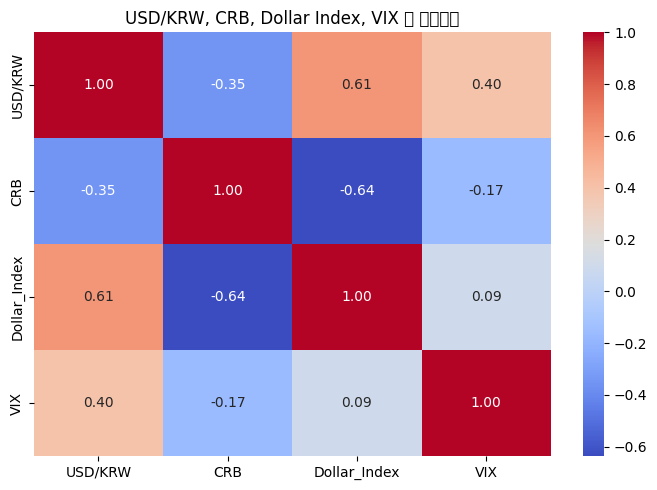

In [ ]:
# 4. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
df_with_vix['VIX'] = df_with_vix['VIX'].interpolate().bfill().ffill()

# 5. ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù
corr = df_with_vix[['USD/KRW', 'CRB', 'Dollar_Index', 'VIX']].corr()

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("USD/KRW, CRB, Dollar Index, VIX Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.tight_layout()
plt.show()

In [ ]:
!pip install yfinance
!pip install --upgrade yfinance

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


             ÎÇ†Ïßú       S&P500
0    2000-01-20  1445.569946
1    2000-01-21  1441.359985
2    2000-01-24  1401.530029
3    2000-01-25  1410.030029
4    2000-01-26  1404.089966
...         ...          ...
6345 2025-04-11  5363.359863
6346 2025-04-14  5405.970215
6347 2025-04-15  5396.629883
6348 2025-04-16  5275.700195
6349 2025-04-17  5282.700195

[6350 rows x 2 columns]


<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

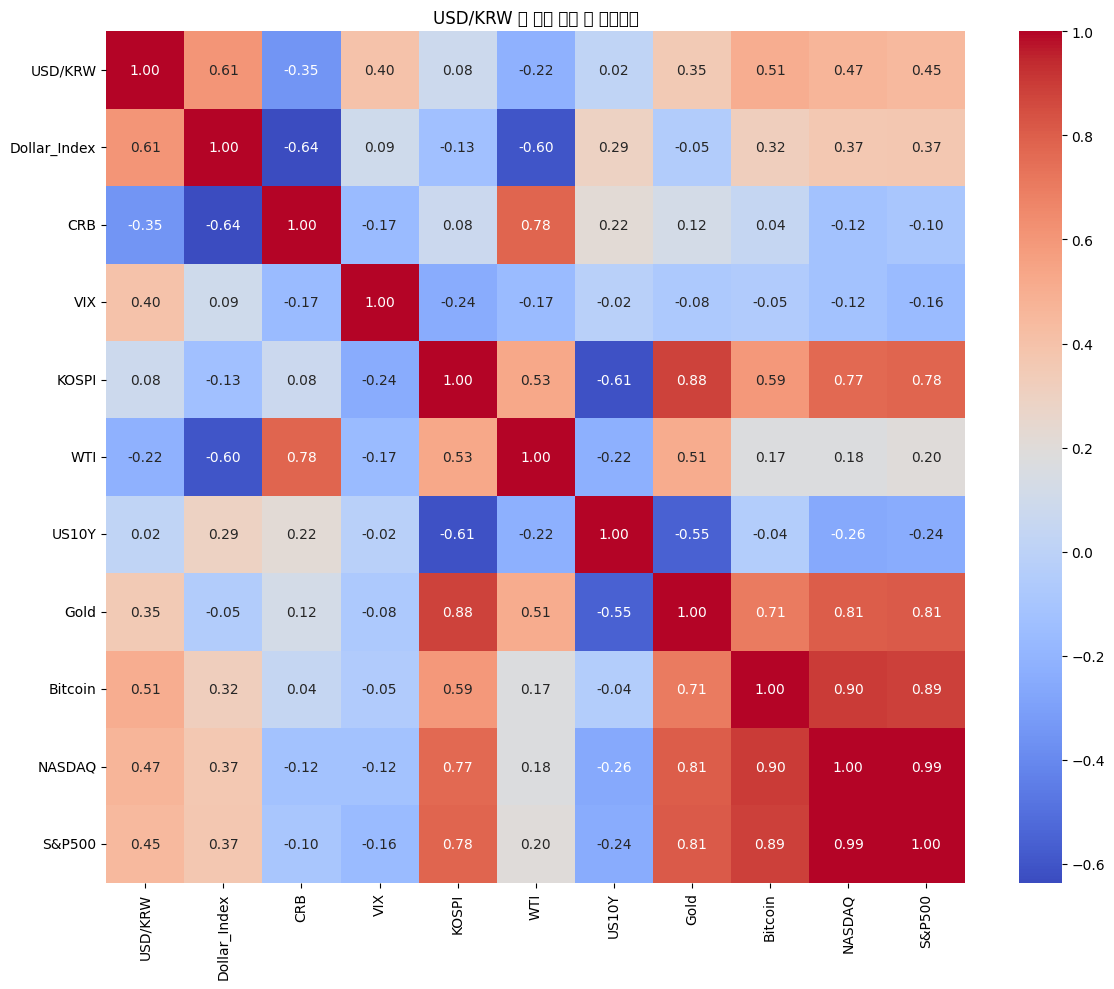

<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

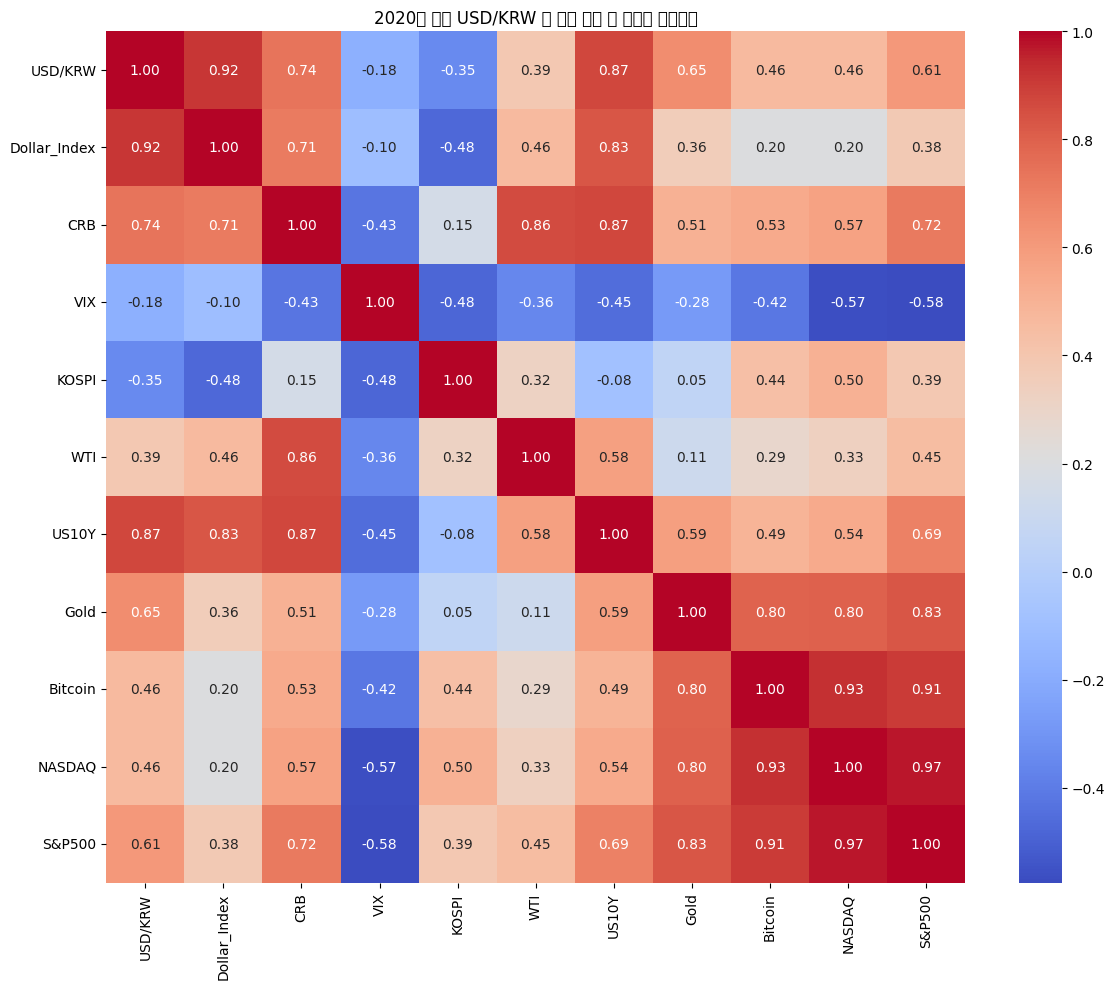

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Îã§ÏñëÌïú ÎèÖÎ¶Ω Î≥ÄÏàò Ìã∞Ïª§ Î™©Î°ù
tickers = {
    'KOSPI': '^KS11',
    'WTI': 'CL=F',
    'US10Y': '^TNX',           # ÎØ∏Íµ≠ 10ÎÖÑÎ¨º Í∏àÎ¶¨
    'Gold': 'GC=F',            # Í∏à ÏÑ†Î¨º
    'Bitcoin': 'BTC-USD',      # ÎπÑÌä∏ÏΩîÏù∏
    'NASDAQ': '^IXIC',         # ÎÇòÏä§Îã• ÏßÄÏàò
    'S&P500': '^GSPC',         # S&P 500
}

raw_data = {}

# Îã§Ïö¥Î°úÎìú Î∞è Î≥ëÌï©
df = df_with_vix.copy()
for name, symbol in tickers.items():
    data = yf.download(symbol, start='2000-01-20', end='2025-04-19')[['Close']]
    data = data.rename(columns={'Close': name}).reset_index()
    data.columns = ['ÎÇ†Ïßú', name]
    raw_data[name] = data  # Í∞úÎ≥Ñ Ï†ÄÏû•
    df = pd.merge(df, data, on='ÎÇ†Ïßú', how='left')

print(data)

# Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ
df[list(tickers.keys())] = df[list(tickers.keys())].interpolate().bfill().ffill()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
corr_cols = ['USD/KRW', 'Dollar_Index', 'CRB', 'VIX'] + list(tickers.keys())
corr_matrix = df[corr_cols].corr()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("USD/KRW Î∞è Í≤ΩÏ†ú ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.tight_layout()
plt.show()

# 2020ÎÖÑ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
df_filtered = df[df['ÎÇ†Ïßú'] >= '2020-01-01'].copy()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ ÎåÄÏÉÅ Ïó¥
corr_cols = ['USD/KRW', 'Dollar_Index', 'CRB', 'VIX'] + list(tickers.keys())

# ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_matrix = df_filtered[corr_cols].corr(method='pearson')

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("2020ÎÖÑ Ïù¥ÌõÑ USD/KRW Î∞è Í≤ΩÏ†ú ÏßÄÌëú Í∞Ñ ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.tight_layout()
plt.show()



In [ ]:
df.to_csv('./Î≥ëÌï©ver3.csv')

In [ ]:
# Ïòà: ÎπÑÌä∏ÏΩîÏù∏ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("üìà Bitcoin:")
display(raw_data['Bitcoin'])

print("üìà WTI:")
display(raw_data['WTI'])

print("üìà KOSPI:")
display(raw_data['KOSPI'])

print("üìà ÎØ∏Íµ≠ 10ÎÖÑ Íµ≠Ï±ÑÍ∏àÎ¶¨:")
display(raw_data['US10Y'])

print("üìà Gold:")
display(raw_data['Gold'])

üìà Bitcoin:


ÎÇ†Ïßú       Bitcoin
0    2014-09-17    457.334015
1    2014-09-18    424.440002
2    2014-09-19    394.795990
3    2014-09-20    408.903992
4    2014-09-21    398.821014
...         ...           ...
3862 2025-04-14  84542.390625
3863 2025-04-15  83668.992188
3864 2025-04-16  84033.867188
3865 2025-04-17  84895.750000
3866 2025-04-18  84450.804688

[3867 rows x 2 columns]

üìà WTI:


ÎÇ†Ïßú        WTI
0    2000-08-23  32.049999
1    2000-08-24  31.629999
2    2000-08-25  32.049999
3    2000-08-28  32.869999
4    2000-08-29  32.720001
...         ...        ...
6184 2025-04-11  61.500000
6185 2025-04-14  61.529999
6186 2025-04-15  61.330002
6187 2025-04-16  62.470001
6188 2025-04-17  64.680000

[6189 rows x 2 columns]

üìà KOSPI:


ÎÇ†Ïßú        KOSPI
0    2000-01-20   945.900024
1    2000-01-21   925.159973
2    2000-01-24   926.770020
3    2000-01-25   891.219971
4    2000-01-26   885.539978
...         ...          ...
6216 2025-04-14  2455.889893
6217 2025-04-15  2477.409912
6218 2025-04-16  2447.429932
6219 2025-04-17  2470.409912
6220 2025-04-18  2483.419922

[6221 rows x 2 columns]

üìà ÎØ∏Íµ≠ 10ÎÖÑ Íµ≠Ï±ÑÍ∏àÎ¶¨:


ÎÇ†Ïßú  US10Y
0    2000-01-20  6.748
1    2000-01-21  6.781
2    2000-01-24  6.684
3    2000-01-25  6.684
4    2000-01-26  6.680
...         ...    ...
6339 2025-04-11  4.493
6340 2025-04-14  4.364
6341 2025-04-15  4.323
6342 2025-04-16  4.279
6343 2025-04-17  4.333

[6344 rows x 2 columns]

üìà Gold:


ÎÇ†Ïßú         Gold
0    2000-08-30   273.899994
1    2000-08-31   278.299988
2    2000-09-01   277.000000
3    2000-09-05   275.799988
4    2000-09-06   274.200012
...         ...          ...
6175 2025-04-11  3222.199951
6176 2025-04-14  3204.800049
6177 2025-04-15  3218.699951
6178 2025-04-16  3326.600098
6179 2025-04-17  3308.699951

[6180 rows x 2 columns]